# Project Description - Bank Churn Prediction
##### Bank Churn Prediction


# Objective:
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Background
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

#### Data Description
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Data Dictionary
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?


## Import Libraries and some necessary modules

In [14]:
#Import the basic modules
import numpy as np
import seaborn as sns
import pandas as pd
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

### Read  the dataset

In [15]:
#load the Excel file into pandas dataframe
df = pd.read_csv('bank.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [16]:
df.shape

(10000, 14)

In [17]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
# Check for missing value 
df.isna().sum()
# there were no missing values observed

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
# Check for duplicate rows
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [22]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [23]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Drop the columns which are unique for all users like IDs (5 points)

####  The following columns were dropped because they were deemed unique for all users: 'CustomerId', 'RowNumber', and 'Surname', Although there is possibility that customers can bear the same surnames, we nevertheless dropped this column as the number of such occurences low. We also found inconsistencies in the surname data such as 'H?'

In [24]:
df  = df.drop("CustomerId" , axis=1)
df.head(10)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [25]:
df  = df.drop("RowNumber" , axis=1)
df.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [26]:
df  = df.drop("Surname" , axis=1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [27]:
# label encoding the categorical data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Gender']= le.fit_transform(df['Gender']) 
df['Geography']= le.fit_transform(df['Geography']) 
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


### Perform univariate analysis on the data to better understand the variables at your disposal and  Perform EDA, create visualizations to explore data. 

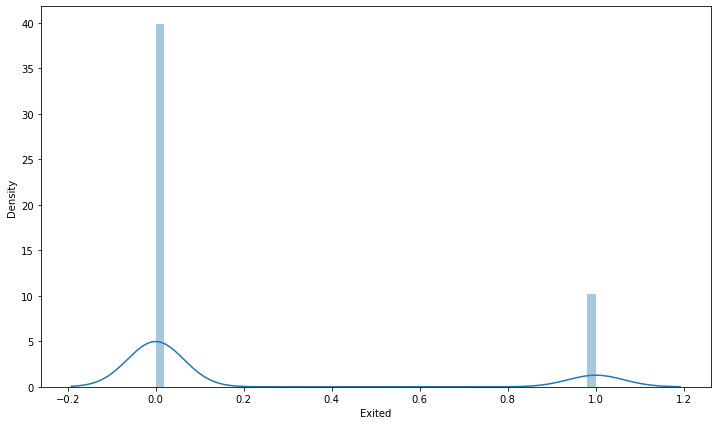

In [28]:
plt.figure(figsize=(12,7))
sns.distplot(df.Exited);

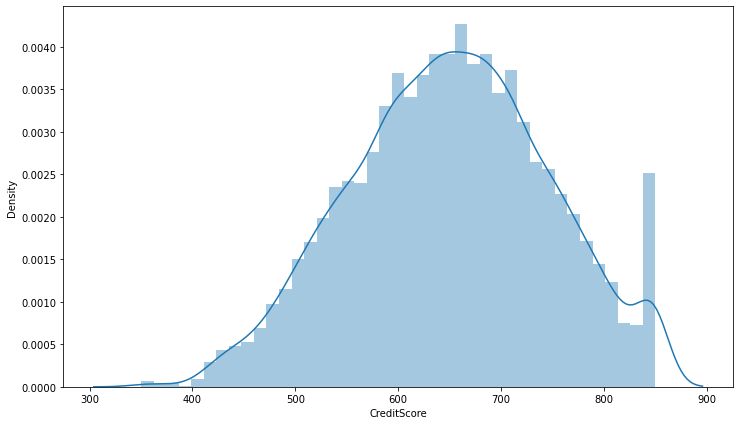

In [29]:
plt.figure(figsize=(12,7))
sns.distplot(df.CreditScore);

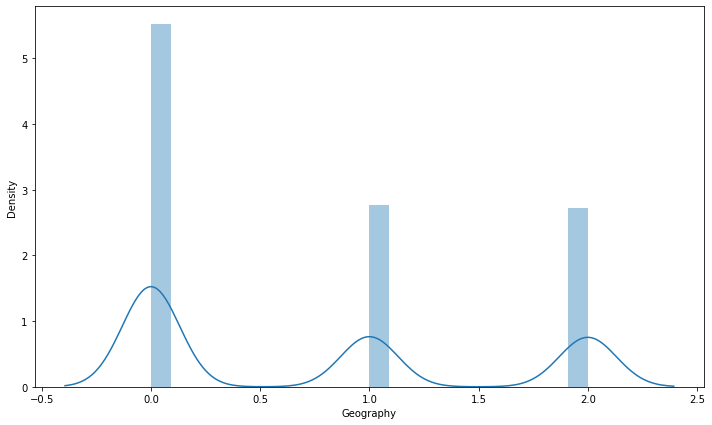

In [30]:
plt.figure(figsize=(12,7))
sns.distplot(df.Geography);

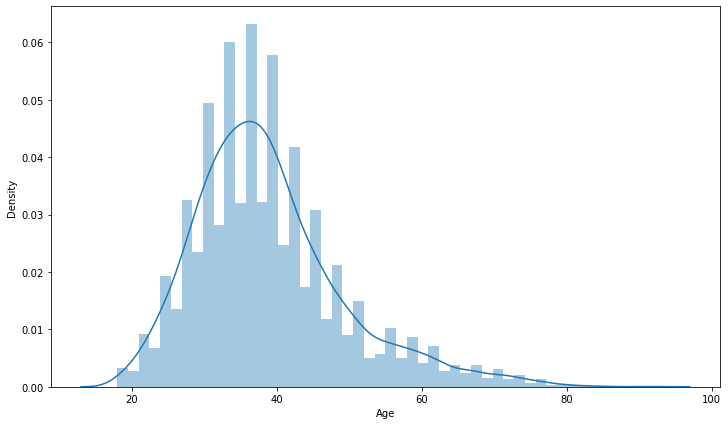

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(df.Age);

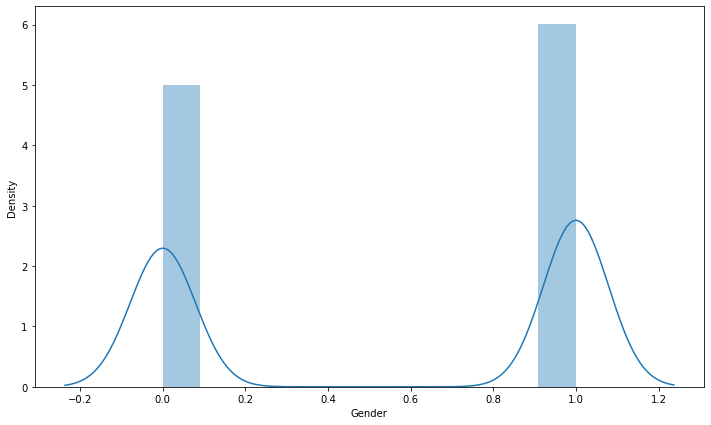

In [32]:
plt.figure(figsize=(12,7))
sns.distplot(df.Gender);

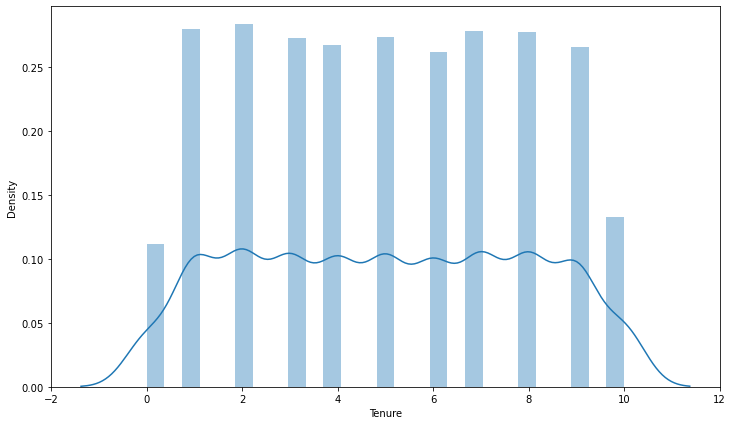

In [33]:
plt.figure(figsize=(12,7))
sns.distplot(df.Tenure);

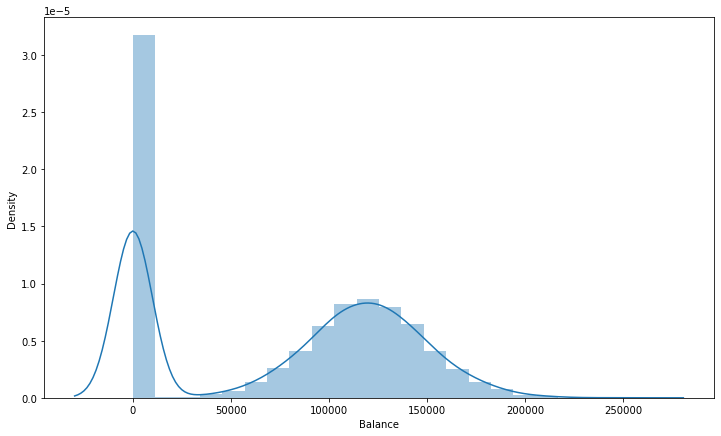

In [34]:
plt.figure(figsize=(12,7))
sns.distplot(df.Balance);

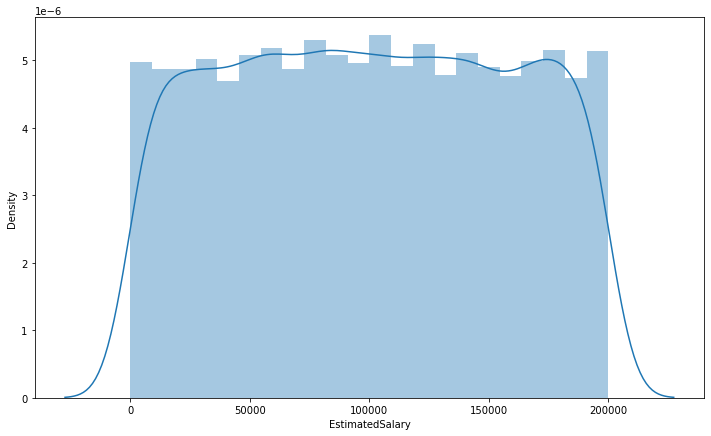

In [35]:
plt.figure(figsize=(12,7))
sns.distplot(df.EstimatedSalary);

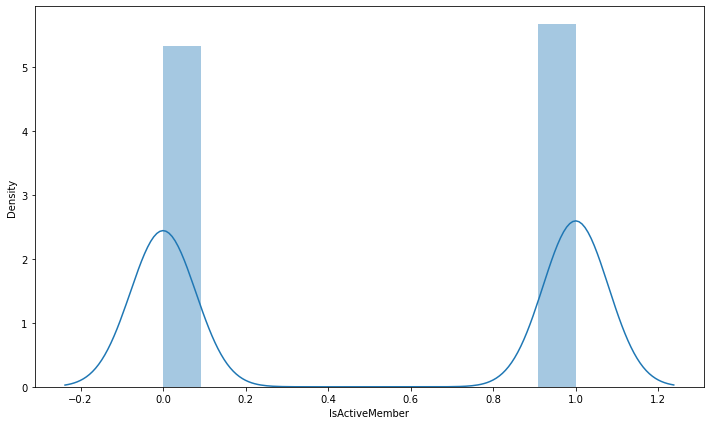

In [36]:
plt.figure(figsize=(12,7))
sns.distplot(df.IsActiveMember);

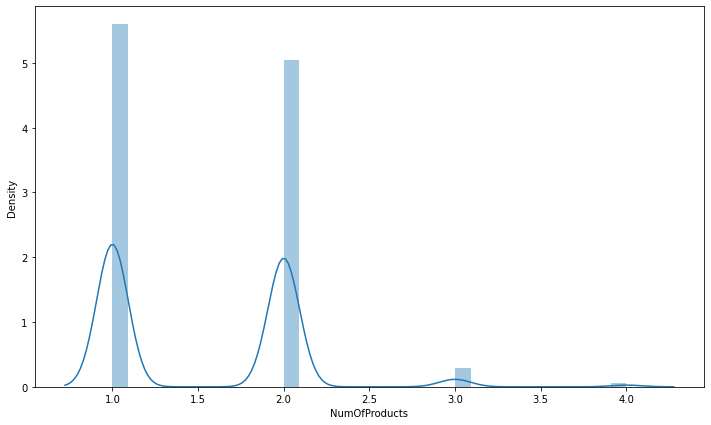

In [37]:
plt.figure(figsize=(12,7))
sns.distplot(df.NumOfProducts);

### Uni-variate analysis: insights
EstimatedSalary and Tenure almost normal distributed.
Gender had more males than females
Balances show a peak with low balances  and then a normal distributed curve between the balances of 50000  and 200000
Age is slightly right skewed and with a peak of approximately 38years

### Perform bivariate analysis and give your insights from the same (5 points) 

In [38]:
# Check for correlation of variable
corr=df.corr(method='pearson')

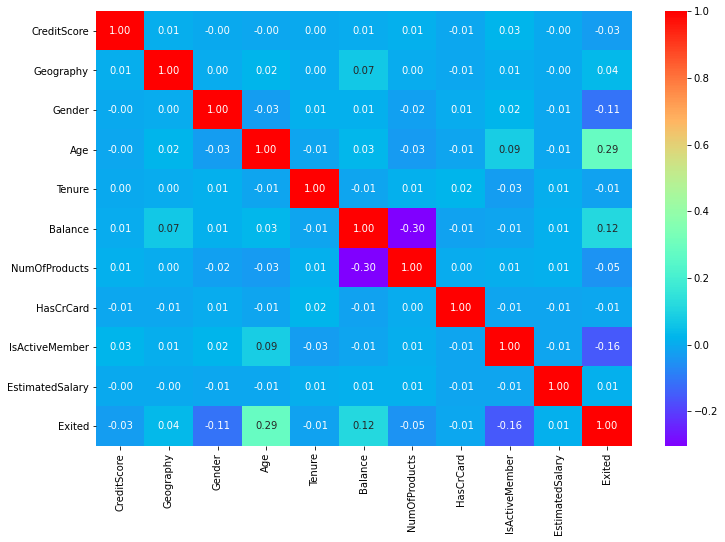

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

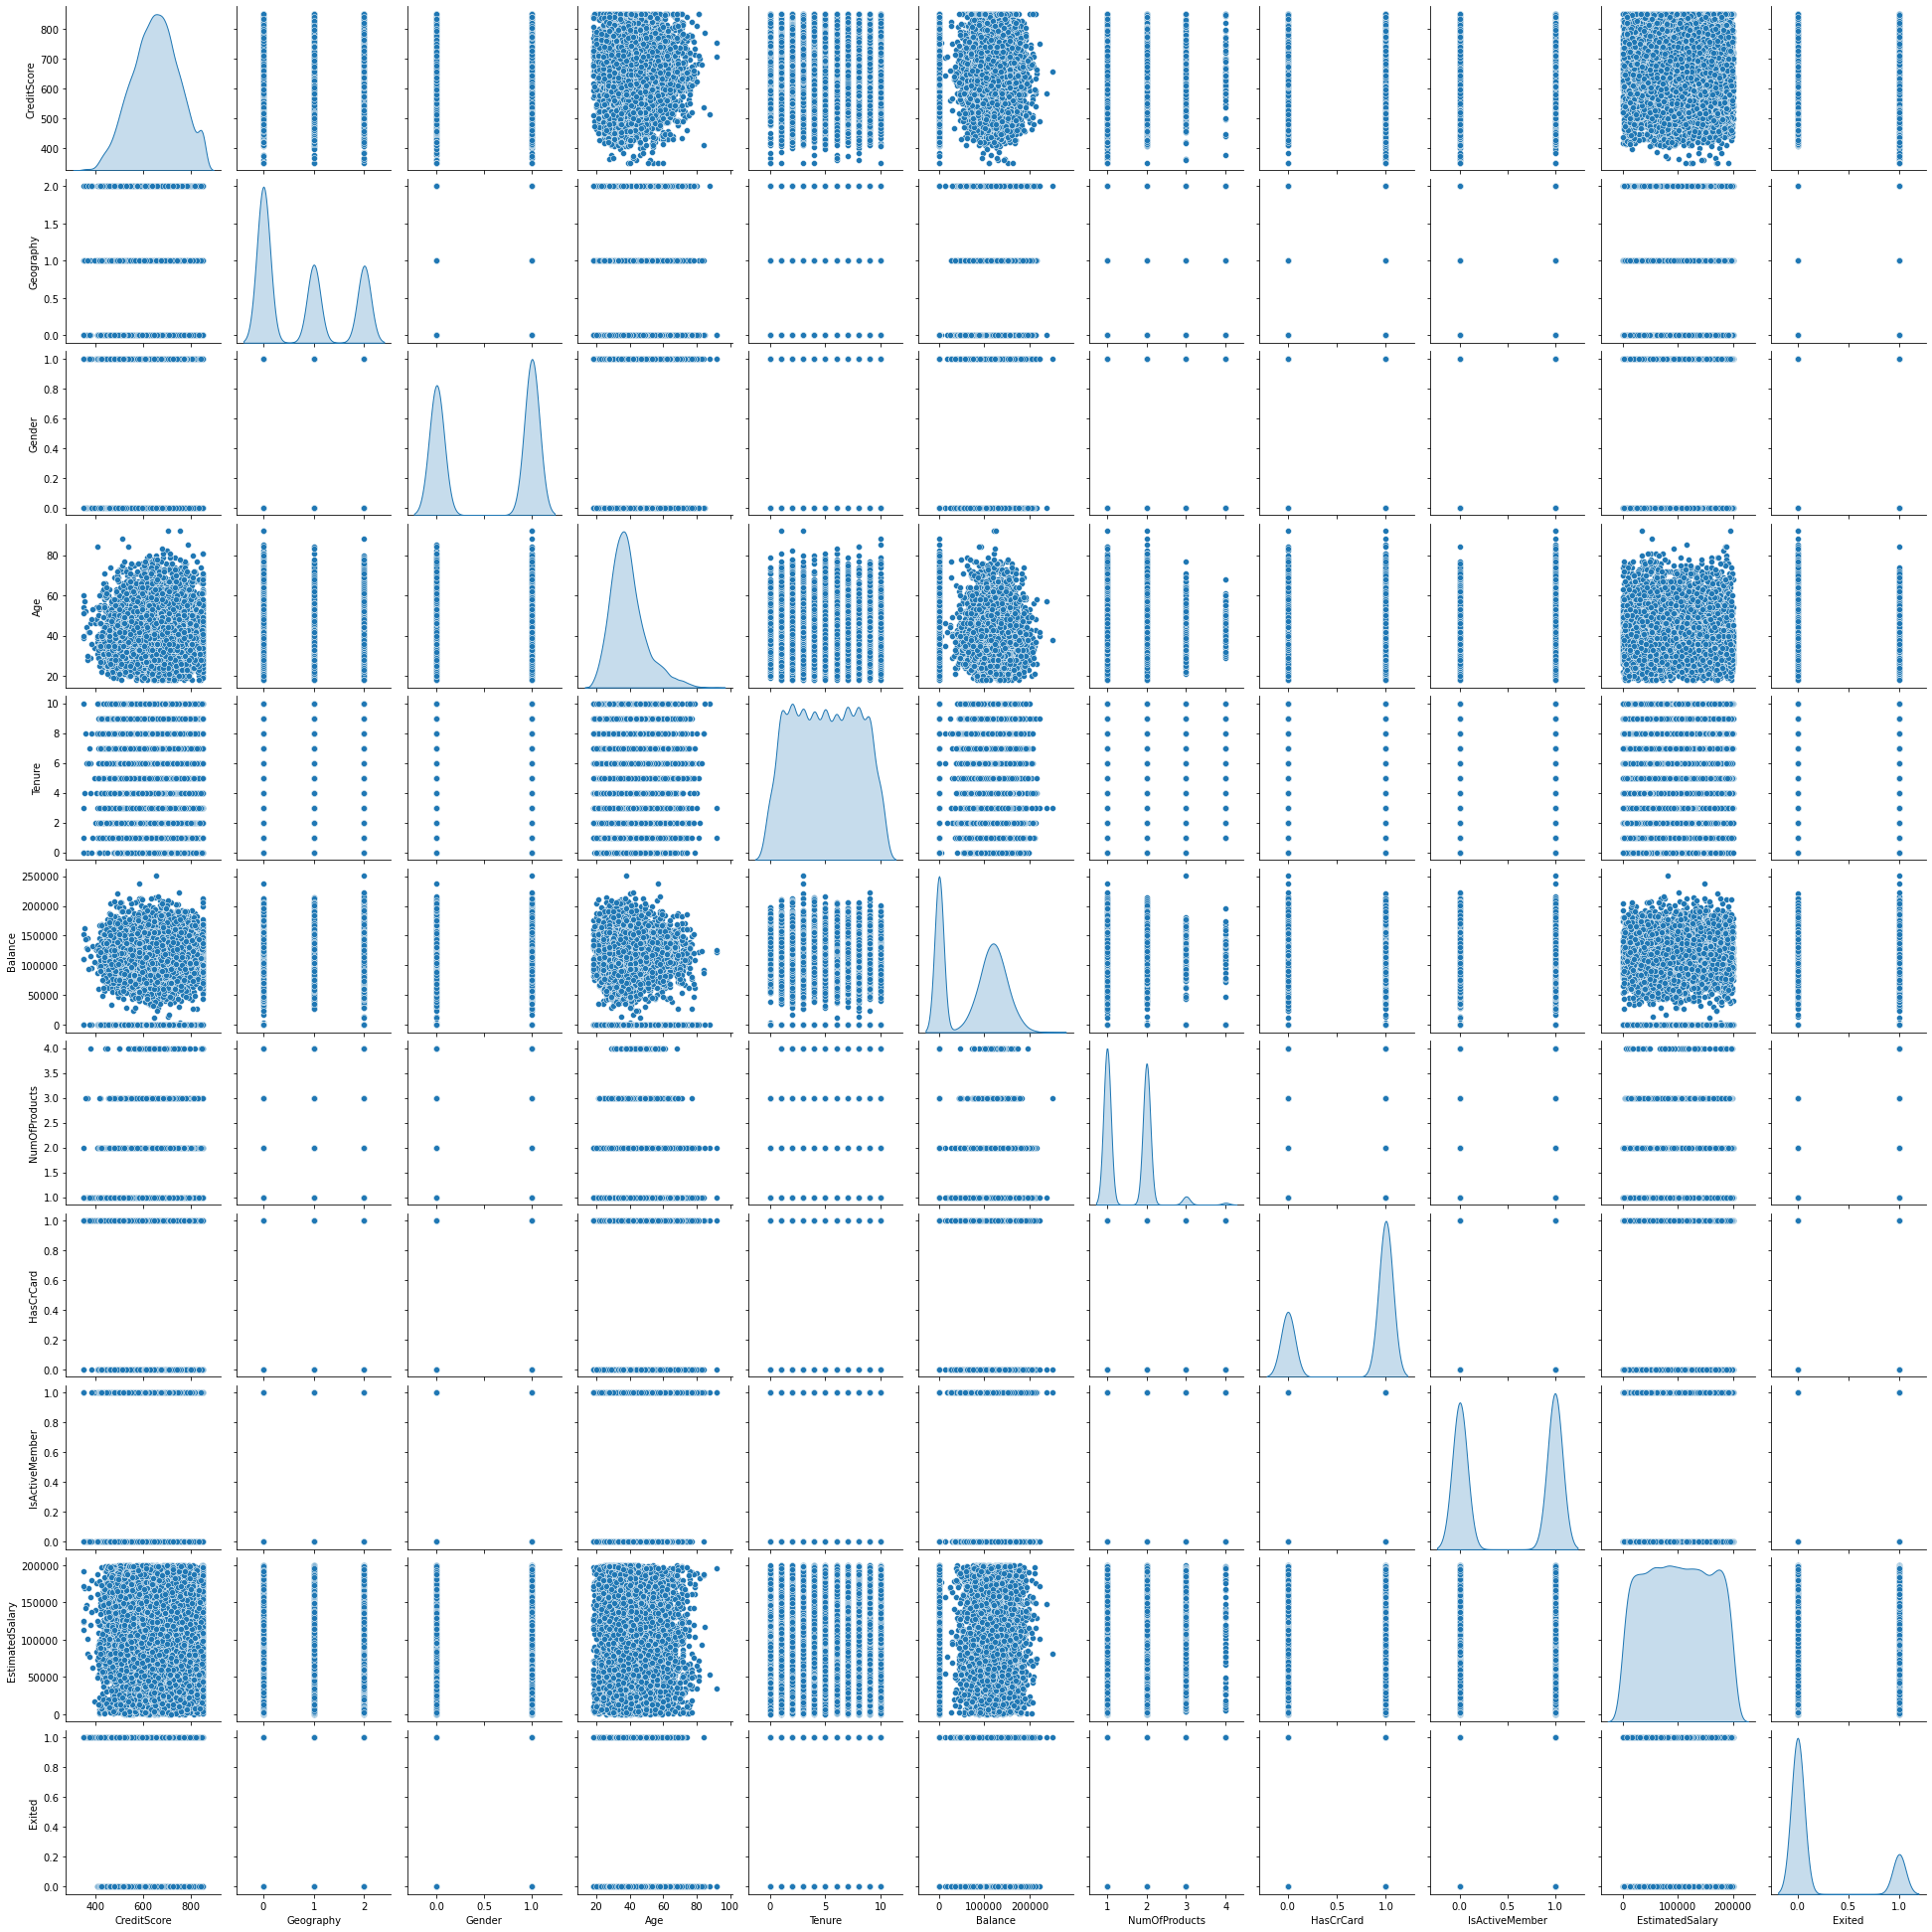

In [40]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
#Let us check for pair plots
sns.pairplot(df,diag_kind='kde')

In [41]:
df['Exited'].value_counts()
#the result below show a class imbalance if Exited is the Target.

0    7963
1    2037
Name: Exited, dtype: int64

### <a id = "link2"></a> Insights from the bi-variate analyses

Some moderate correlations observed among the variables or features such as: correlation Age and IsActiveMember; negative correlation between Balance and NumOfProducts; Also Age had the strongest correlation with Exited although from the 'value_counts()' the data was imbalanced from the perspective of the positive/negative class of Target variable.  However no dimension reduction technique such as PCA was considered in this project.

### Distinguish the feature and target set and divide the data set into training and test sets (5 points)

In this work, and as will be shown in next section and subsequent, the datset was split into 3 disjoint sets of examples: training set, validation set, and test set. The training set was used to train the model. The validation set was used to find the best values of the hyperparameters. Finally the test set was used to test the best model obtained and to report the results. The validation set and the test set are often referred to as holdout sets as they contain examples that the learning algorithm is not sllowed to see.

In [42]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=df.iloc[:,0:10]

# Specify the target labels and flatten array
y= df.Exited


# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#y_train =  np.array(y_train)
#y_test =  np.array(y_test)

In [43]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


### Normalize the train and test data (10points)

In [44]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

### Initialize & build the model. Identify the points of improvement and implement the same. (20)

In [50]:
# Using Tensorflow Keras instead of the original Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


ncols = X_train.shape[0]

# Initialize the constructor
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu', input_dim = 10))

# Add an first hidden layer 
model.add(Dense(25, activation='relu', kernel_initializer='normal'))

# second hidden layer
model.add(Dense(10, activation='relu', kernel_initializer='normal'))


# Add dense layer which provides 10 outputs after applying softmax
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [51]:
adam_optimizer = tf.keras.optimizers.Adam(lr=0.0055)
model.compile(optimizer=adam_optimizer,loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy' ])

In [52]:
epochs=50
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

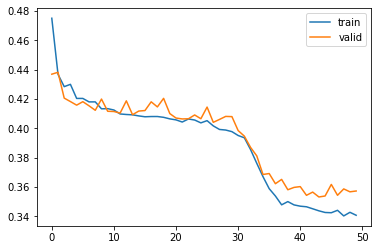

In [53]:
import matplotlib.pyplot as plt

plt.plot(hist['binary_crossentropy'])
plt.plot(hist['val_binary_crossentropy'])
plt.legend(("train" , "valid") , loc =0)

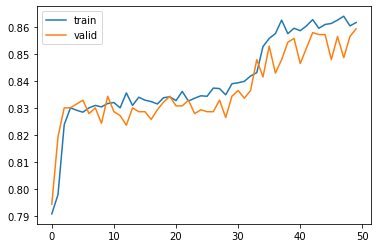

In [54]:
import matplotlib.pyplot as plt

plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

### The areas of improvement observed included the following:
- Number of dense layers
- learning rate
- number of neurons in the hidden layers
- loss functions
- activation functions

- I tried out different  combinations of these improvement areas and the  model and hyper parameters shown were the best.

- 
In this work, the datset was split into 3 disjoint sets of examples: training set, validation set, and test set. The training set was used to train the model. The validation set was used to find the best values of the hyperparameters. Finally the test set was used to test the best model obtained and to report the results. The validation set and the test set are often referred to as holdout sets as they contain examples that the learning algorithm is not sllowed to see.

### Inspect the model

In [55]:
#Train the model by calling the fit() method
model.fit(X_train,y_train, epochs= 50)

Epoch 1/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8594 - binary_crossentropy: 0.3446
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8606 - binary_crossentropy: 0.3415
Epoch 3/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8587 - binary_crossentropy: 0.3426
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8604 - binary_crossentropy: 0.3436
Epoch 5/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8594 - binary_crossentropy: 0.3416
Epoch 6/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8609 - binary_crossentropy: 0.3437
Epoch 7/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8603 - binary_crossentropy: 0.3422
Epoch 8/50
219/219 [==============================] - 0s 1ms/step - loss: 0.3421 - accurac

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________


### Predict the results using 0.5 as a threshold (10points)

In [57]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

###  Print the Accuracy score and confusion matrix (5 points)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2286,  130],
       [ 274,  310]], dtype=int64)

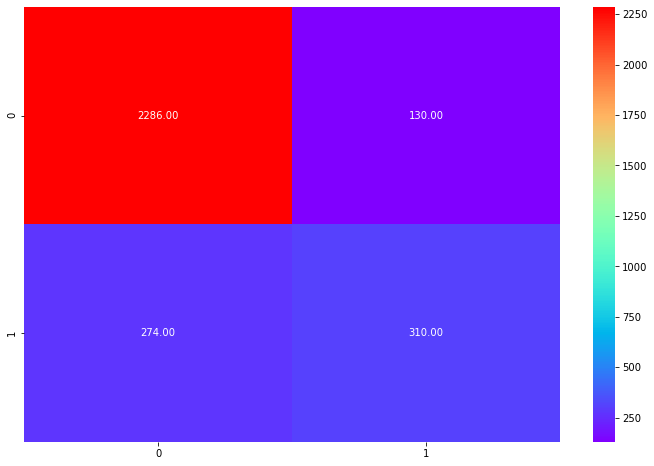

In [59]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix,annot=True,fmt='.2f',cmap='rainbow' )
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8653333333333333

### Summary and Conclusion

####
In this project, a neural network-based classifier was built  that could determine whether a given customer would  leave or not in the next 6 months.This classifier, a fully connected network, consisted of an input layer, 2 hidden layers and an output layer with 656 trainable parameters.The purpose of the classifier was to enable the bank address the problem of 'Churn'. Specifically a classifier that, given a Bank customer, should be capable of predicting  whether they will leave or not in the next 6 months. 
Although, from the Confusion matrix, there appears to be class imbalance, the model is able to predict better the customers that can leave the Bank within the next 6 months compared to the customers that may stay. Therefore as a priority there is a need to gather more data to ensure class balance.  
It is  important to understand which aspects of the service influence a customer's decision in this regard. From the univariate and bi-variate analyses, the features that had most influences and the correlations among the features were given. Management can  therefore concentrate efforts on the improvement of service, keeping in mind these priorities.
In summary, the business objective for this project was largely achieved.